In [32]:
import numpy as np
import matplotlib.pyplot as plt
from LoopStructural.utils.helper import rotation
from LoopStructural import GeologicalModel
from LoopStructural.visualisation import LavaVuModelViewer
from LoopStructural import GeologicalModel
from LoopStructural.utils import log_to_file
from LoopStructural.analysis import displacement_missfit
from LoopStructural.utils import process_map2loop, build_model
fault_params = {'interpolatortype':'FDI',
                'nelements':1e3,
#                 'data_region':.2, 
                'fault_buffer':0.4,
                'solver':'pyamg',
#                 overprints:overprints,
                'cpw':10,
                'npw':10}
foliation_params = {'nelements':1e4,  # how many tetras/voxels
                    'buffer':2.5,  # how much to extend nterpolation around box
                    'solver':'pyamg',
                    'npw':1,
                    'cpw':1,
                    'interpolatortype':'FDI',
                    'damp':True}
# global evaluate_value_calls 
view = LavaVuModelViewer()
images = {}
vectors = {}
#for angle in np.arange(0,360,30):#[-90,-60,-30,0,30,60,90]:
m2l_data = process_map2loop('./gmdpaper-faultslip')


2021-03-15 05:30:34,337 ~ LoopStructural.visualisation.model_visualisation ~ ERROR      ~ Plot area has not been defined.
2021-03-15 05:30:34,337 ~ LoopStructural.visualisation.model_visualisation ~ ERROR      ~ Plot area has not been defined.
2021-03-15 05:30:34,337 ~ LoopStructural.visualisation.model_visualisation ~ ERROR      ~ Plot area has not been defined.


In [33]:
m2l_data['data']['feature_name'].unique()

array(['Fortescue_Group', 'Hamersley_Group', 'supergroup_0', 'Fault_7344',
       'Fault_5997', 'Fault_6205'], dtype=object)

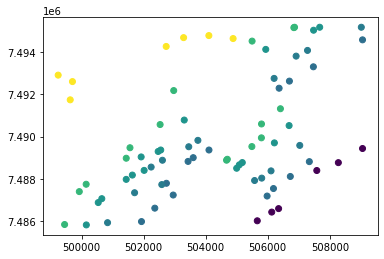

In [34]:
mask = np.logical_and(m2l_data['data']['feature_name']=='supergroup_0',~np.isnan(m2l_data['data']['val']))
plt.scatter(m2l_data['data'].loc[mask,'X'],m2l_data['data'].loc[mask,'Y'],c=m2l_data['data'].loc[mask,'val'])

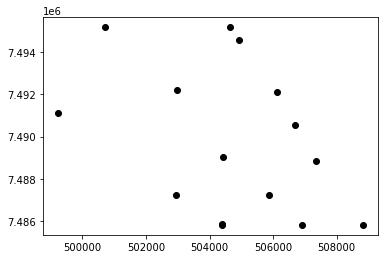

In [35]:
for f in m2l_data['data']['feature_name'].unique():
    if f.find('Fault') > -1:
        mask = np.logical_and(m2l_data['data']['feature_name']==f,~np.isnan(m2l_data['data']['val']))
        plt.scatter(m2l_data['data'].loc[mask,'X'],m2l_data['data'].loc[mask,'Y'],c='black')

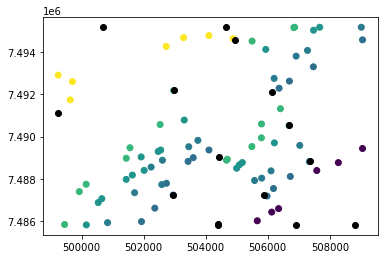

In [36]:
mask = np.logical_and(m2l_data['data']['feature_name']=='supergroup_0',~np.isnan(m2l_data['data']['val']))
plt.scatter(m2l_data['data'].loc[mask,'X'],m2l_data['data'].loc[mask,'Y'],c=m2l_data['data'].loc[mask,'val'])
for f in m2l_data['data']['feature_name'].unique():
    if f.find('Fault') > -1:
        mask = np.logical_and(m2l_data['data']['feature_name']==f,~np.isnan(m2l_data['data']['val']))
        plt.scatter(m2l_data['data'].loc[mask,'X'],m2l_data['data'].loc[mask,'Y'],c='black')

(array([ 6.,  0.,  0., 30., 18., 16.,  0.,  0.,  7., 15.]),
 array([-1913.5 , -1722.15, -1530.8 , -1339.45, -1148.1 ,  -956.75,
         -765.4 ,  -574.05,  -382.7 ,  -191.35,     0.  ]),
 <BarContainer object of 10 artists>)

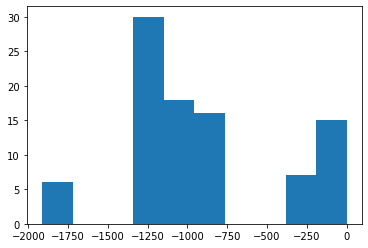

In [37]:
mask = np.logical_and(m2l_data['data']['feature_name']=='supergroup_0',~np.isnan(m2l_data['data']['val']))
plt.hist(m2l_data['data']['val'])

In [38]:
for k,f in m2l_data['stratigraphic_column']['faults'].items():
#     print(f.keys())
    f['HorizontalRadius'] *=2
    f['VerticalRadius'] *=2

In [39]:
# angle = 0
# vectors[angle]={}

#     f['FaultSlip'] = np.dot(rotation(f['FaultNorm'],angle),f['FaultSlip'])
#     vectors[angle][k] = f['FaultSlip']

m2l_data['stratigraphic_column']
model = build_model(m2l_data,
                    skip_faults=False,
                    rescale=False,
                    evaluate=False,
                    fault_params=fault_params,
                    foliation_params=foliation_params,
                    unconformities=False)
# model, m2l_data = GeologicalModel.from_map2loop_directory('./gmdpaper-faultslip',
#                                                         skip_faults=False,
#                                                           rescale=False,
#                                                           evaluate=False,
#                                                         fault_params=fault_params,
#                                                         foliation_params=foliation_params,
#                                                          unconformities=False)
# for f in model.features:
#     if f.type == 'fault':
#         print(f[0].interpolator.nx)
#     else:
#         print(f.interpolator.nx)
model.update()
view.clear()
view.model = model
view.nelements=5e6

view.add_model()#_surfaces(name='_angle_{}'.format(angle),faults=False,alpha=0.5)
view.rotation = [-62.97486877441406, -32.8342399597168, -4.263551712036133]
# images[angle] = view.image_array()

  0%|          | 0/10 [00:00<?, ?it/s]

NameError: name 'angle' is not defined

In [43]:
view.nelements=1e5
view.add_model_surfaces()
view.add_data(model['supergroup_0'])
view.interactive()

  0%|          | 0/11 [00:00<?, ?it/s]

Adding surfaces took 4.263017654418945 seconds



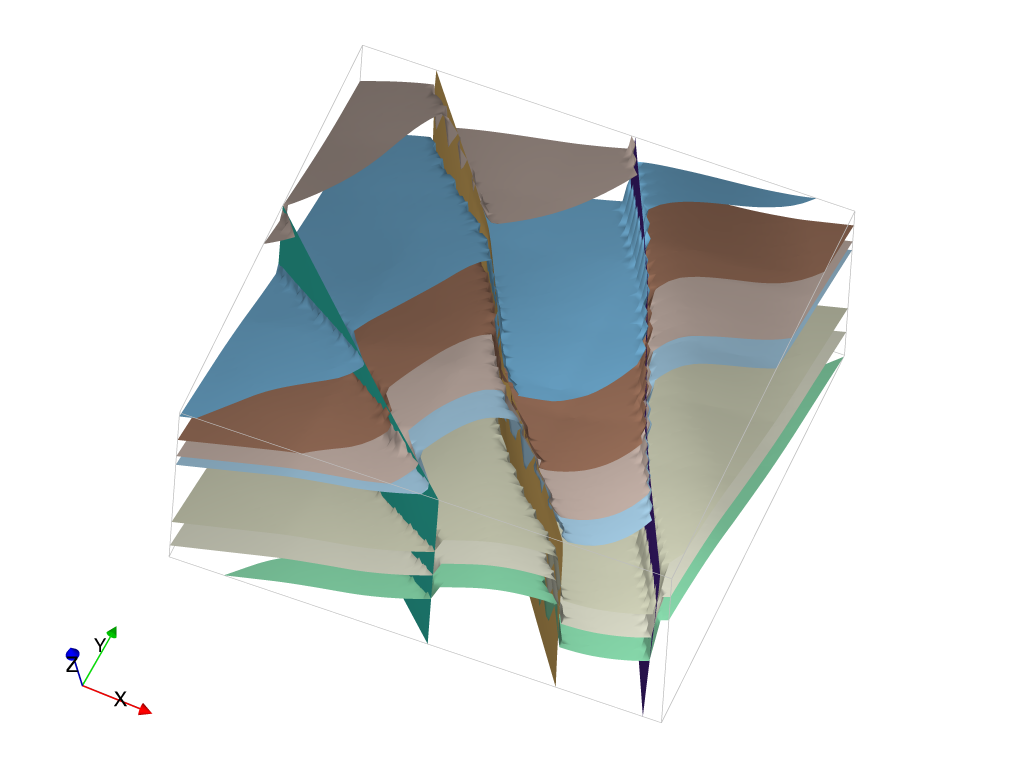

In [46]:
view.display()

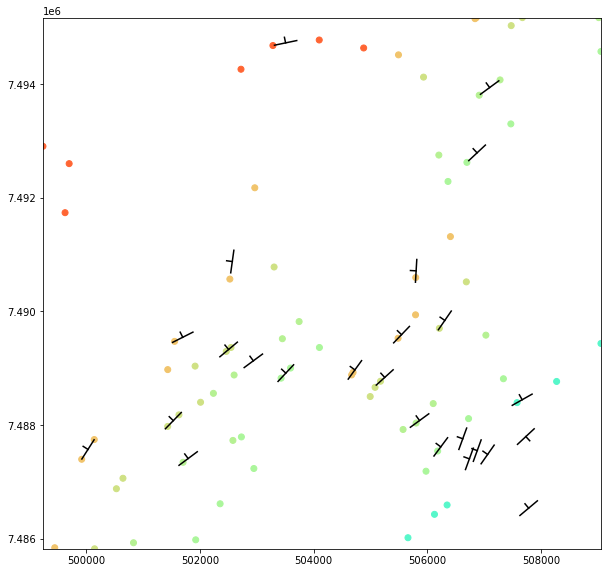

In [40]:
from LoopStructural.visualisation import MapView
mapview = MapView(model)
mapview.add_data(model['supergroup_0'],dip=False,symb_scale=200)

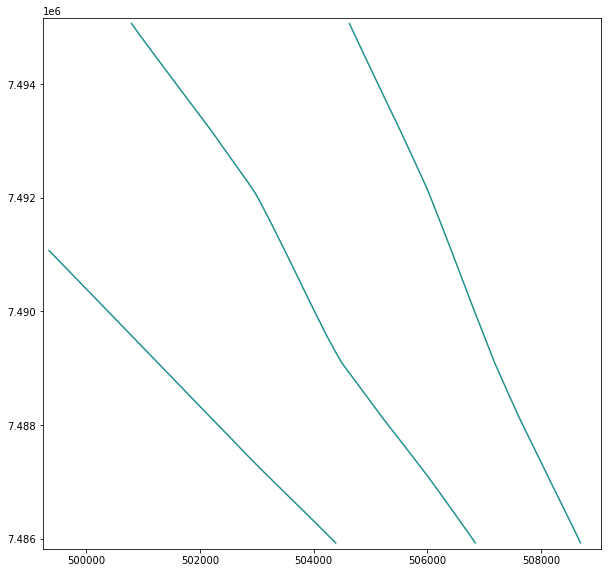

In [42]:
mapview = MapView(model)
mapview.add_faults()

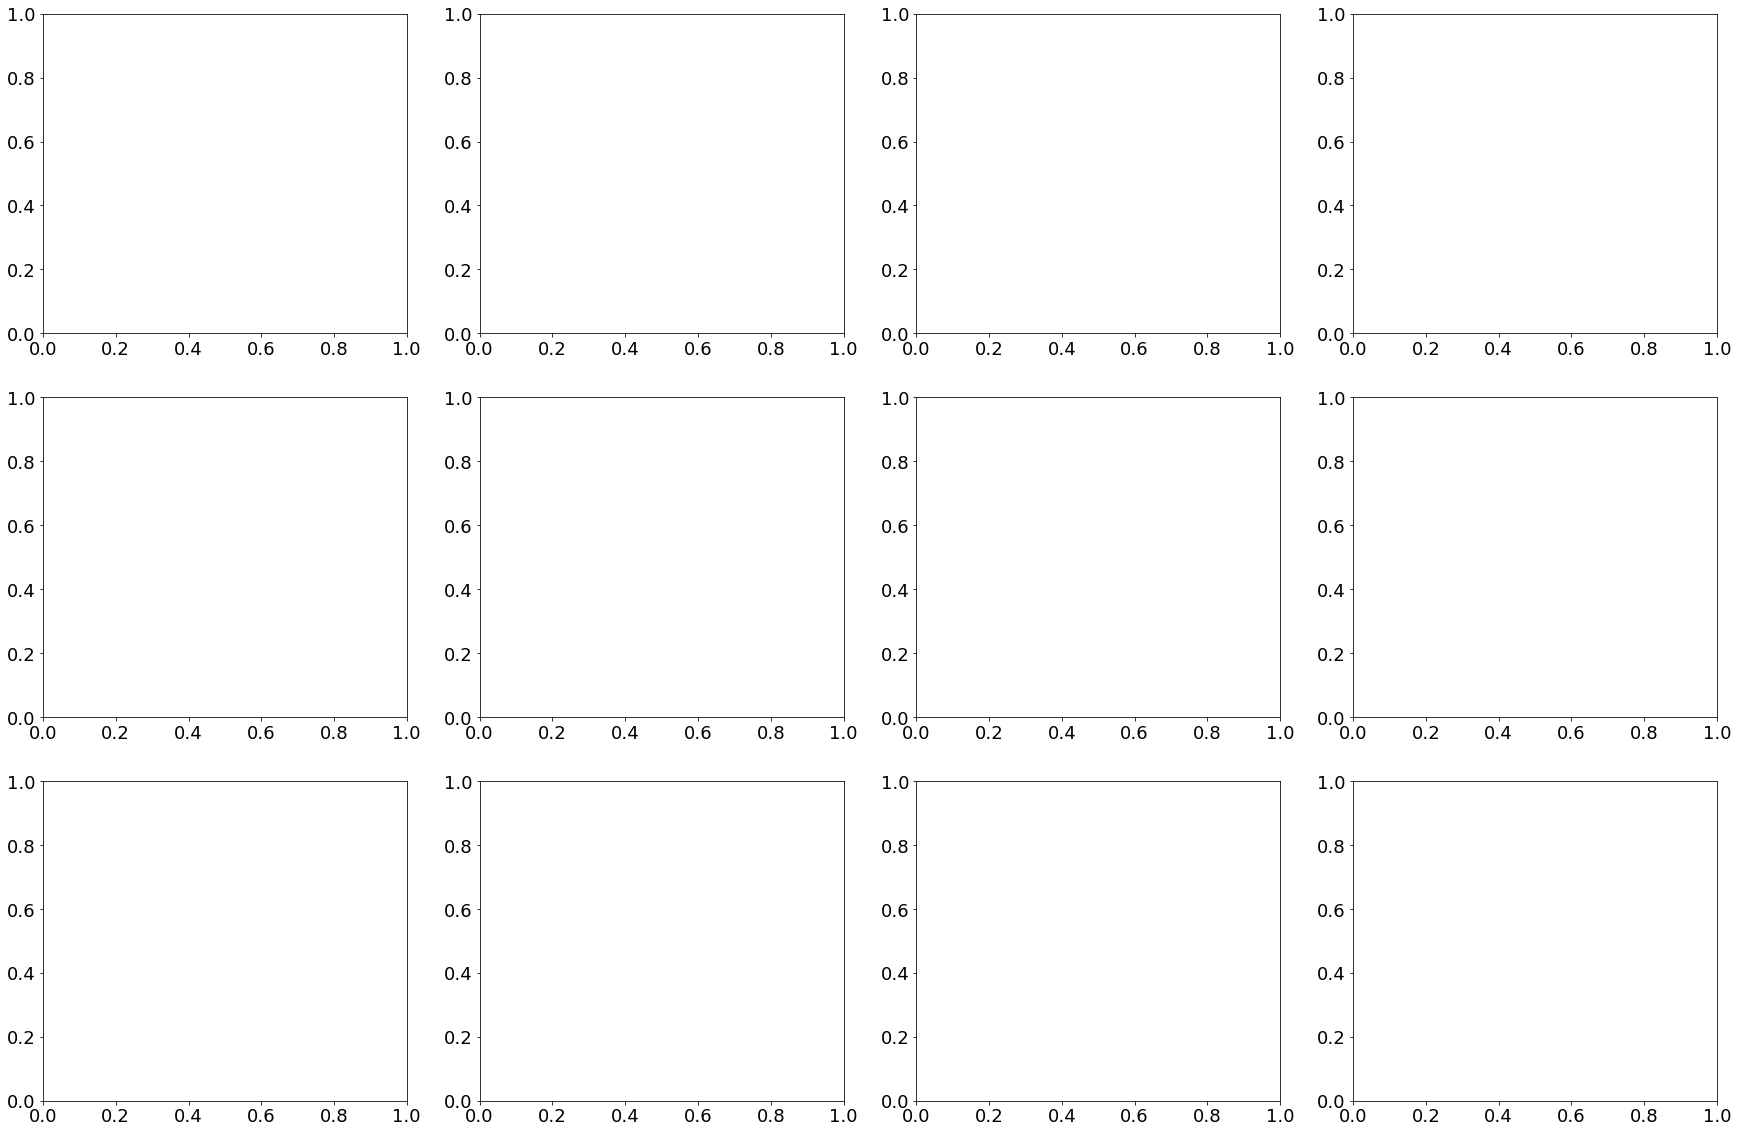

In [22]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mplstereonet import StereonetAxes
import matplotlib
import mplstereonet
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(3,4,figsize=(30,20))

# for j in range(3):
# #     ax[0,j].axis('off')
#     ax[0,j].imshow(images[-j*30])
# #     ax[1,j].axis('off')
#     ax[1,j].imshow(images[j*30])
#     ax[1,j].set_title('{}'.format(-(j+1)*30))
#     ax[0,j].set_title('{}'.format((j+1)*30))

for i,im in enumerate(images.values()):
    ax[i//4,i%4].axis('off')
    ax[i//4,i%4].imshow(im)
    ax[i//4,i%4].set_title(r'Rotation around fault normal ${}^\circ$'.format(i*30))
    
    stereo = inset_axes(ax[i//4,i%4], width="30%", height="35%", loc=1,axes_class=StereonetAxes)
    stereo.set_azimuth_ticks([])
    stereo.grid()
    v = vectors[i*30]
    colours = ['red','green','blue','orange']
    k = 0
    for fault in m2l_data['stratigraphic_column']['faults'].values():
#             print(fault)
#         print(colours[k])
        stereo.plane(*mplstereonet.vector2pole(*tuple(fault['FaultNorm'])),color=colours[k],linestyle='dashed')
        k+=1
    k=0
    for f,vec in v.items():
        if i*30 < 180:
            col = 'black'
        else:
            col = 'red'
        stereo.line(*mplstereonet.vector2plunge_bearing(*tuple(vec)),color=colours[k])
        k+=1
#     plt.figure()
# plt.tight_layout()